<a href="https://colab.research.google.com/github/melanie197/01_hello-world.py/blob/main/3_1_5_5_Lab_Correlation_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Título](Images/cisco.png)

# Práctica de laboratorio: Análisis de correlación en Python


### Objetivos

<b>
* Parte 1: El conjunto de datos
* Parte 2: Gráficos de dispersión y variables correlacionables
* Parte 3: Calcular la correlación con Python
* Parte 4: Visualización
</b>

### Aspectos básicos/situación

La correlación es una relación estadística importante que puede indicar si los valores variables tienen relación lineal.

En esta práctica de laboratorio aprenderá a utilizar Python para calcular la correlación. En la Parte 1, configurará el conjunto de datos. En la Parte 2, aprenderá a identificar si las variables de un conjunto de datos determinado son correlacionables. Por último, en la Parte 3, utilizará Python para calcular la correlación entre dos conjuntos de variables.

### Recursos necesarios
* 1 computadora con acceso a Internet
* Raspberry Pi versión 2 o superior
* Bibliotecas de Python: pandas, numpy, matplotlib, seaborn
* Archivos de datos: brainsize.txt

## Parte 1: El conjunto de datos

Se utilizará un conjunto de datos que contiene un ejemplo de 40 estudiantes diestros de introducción a la psicología anglosajona de la una gran universidad de Southwestern. Los sujetos realizaron cuatro pruebas secundarias (vocabulario, similitudes, diseño de bloque y finalización de imagen) de la Escala Wechsler de Inteligencia para Adultos (1981) revisada. Los investigadores utilizaron imágenes por resonancia magnética (IRM) para determinar el tamaño del cerebro de los sujetos. También se incluyó información sobre el género y el tamaño del cuerpo (altura y peso). Los investigadores ocultaron los pesos de dos sujetos y la altura de un sujeto por razones de confidencialidad.
Se realizaron dos modificaciones sencillas en el conjunto de datos:

1. Se reemplazaron los signos de interrogación utilizados para representar los puntos de datos ocultos descritos anteriormente por la cadena “NaN”. La sustitución se realizó porque Pandas no utiliza los signos de interrogación correctamente.

2. Reemplazar todos los caracteres de tabulación por comas y así convertir el conjunto de datos en un conjunto de datos CSV.

El conjunto de datos elaborado se guarda como 'brainsize.txt'.

#### Paso 1: Carga del conjunto de datos desde un archivo.

Antes de utilizar el conjunto de datos, debe cargarlo en la memoria.

En el siguiente código, la primera línea importa los módulos 'pandas' y define 'pd' como un descriptor que se refiere al módulo.

La segunda línea carga el archivo CSV del conjunto de datos en una variable llamada 'brainFile'.

La tercera línea utiliza 'read_csv()', un método 'pandas' para convertir el conjunto de datos CSV guardado en 'brainFile' en una estructura de datos. La estructura de datos se almacena luego en la variable 'brainFrame'.

Ejecute la siguiente celda para activar las funciones descritas.

In [1]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile)

#### Paso 2: Verificación del marco de datos.

Para asegurarse de que el marco de datos se haya cargado y creado correctamente, utilice el método 'head()'. Otro método pandas, 'head()' muestra las primeras cinco entradas de un marco de datos.

In [2]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Parte 2: Gráficos de dispersión y variables correlacionables

#### Paso 1: El método pandas 'describe()'.
El módulo de pandas incluye el método 'describe()', que realiza los mismos cálculos comunes sobre un conjunto de datos determinado. Además de proporcionar resultados comunes, incluidos el conteo, la media, la desviación estándar, el mínimo y el máximo, 'describe()' también es una excelente manera de probar rápidamente la validez de los valores del marco de datos.<p>
Ejecute la siguiente celda para emitir los resultado computados por 'describe()' según el marco de datos 'brainFrame'.

In [3]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Paso 2: Gráficos de dispersión

Los gráficos de dispersión son importantes al trabajar con correlaciones, ya que permiten una verificación visual rápida de la naturaleza de la relación entre las variables. Esta práctica de laboratorio utiliza el coeficiente de correlación de Pearson, que es sensible sólo a una relación lineal entre dos variables. Existen oros métodos de correlación más robustos, pero exceden el alcance de esta práctica de laboratorio.

##### a. Cargar los módulos requeridos.
Antes de trazar los gráficos, es necesario importar algunos módulos, como 'numpy' y 'matplotlib'. Ejecutar la siguiente celda para cargar estos módulos.

In [4]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

##### b. Separar los datos.
Para asegurarse de que los resultados no se sesguen debido a las diferencias entre organismos femeninos y masculinos, la estructura de datos se divide en dos: una que contiene todas las entradas masculinas y otra solo con instancias femeninas. <p>
Al ejecutar la siguiente celda, se crean las dos nuevas estructuras de datos, menDf y womenDf; cada una incluye las entradas respectivas.

In [5]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]
womenDf.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258


##### c. Trazar los gráficos.
Como el conjunto de datos incluye tres medidas diferentes de inteligencia (PIQ, FSIQ y VIQ), la primera línea que figura a continuación utiliza el método Pandas 'mean()' para calcular el valor promedio entre las tres y guardar el resultado en la variable 'menMeanSmarts'. Observe que la primera línea también se refiere a menDf, la estructura de datos filtrada que contiene sólo las entradas masculinas.<p>
La segunda línea utiliza el método 'matplotlib' 'scatter()' para crear un gráfico de dispersión entre la variable 'menMeanSmarts' y el atributo 'MRI_Count'. El MRI_Count de este conjunto de datos se puede considerar como una medida del tamaño físico del cerebro de los sujetos.<p>
La tercera línea simplemente muestra el gráfico.<p>
La cuarta línea se utiliza para garantizar que el gráfico se muestre en esta libreta de anotaciones.

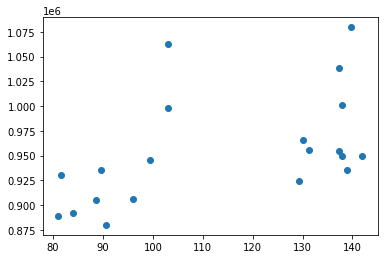

In [6]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Del mismo modo, el siguiente código crea un gráfico de dispersión para la estructura de datos filtrada solo para mujeres.

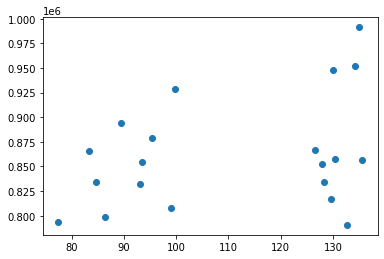

In [7]:
# Code cell 7
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

## Parte 3: Calcular la correlación con Python


#### Paso 1: Calcular la correlación según brainFrame.
El método pandas 'corr()' ofrece una manera fácil de calcular la correlación según una estructura de datos. Simplemente empleando el método según una estructura de datos, uno puede obtener la correlación entre todas las variables al mismo tiempo.

In [8]:
# Code cell 8
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Observe la diagonal de izquierda a derecha en la tabla de correlación generada arriba. ¿Por qué la diagonal está plagada de 1? ¿Se trata de una coincidencia? Explique.

Si continuamos observando la tabla de correlación que figura arriba, notaremos que los valores se duplican; los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1. ¿Se trata de una coincidencia? Explique.

Con el mismo método 'corr()' es fácil calcular la correlación de las variables que contiene la estructura de datos solo femenina:

In [9]:
# Code cell 9
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


Y lo mismo se puede hacer para la estructura de datos solo masculina:

In [10]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Parte 4: Visualización

#### Paso 1: Instalar Seaborn.
Para que sea más sencillo visualizar las correlaciones de datos, se pueden utilizar mapas de calor. Según los cuadros de color, los gráficos del mapa de calor pueden ayudar a identificar correlaciones al instante.

El módulo de Python denominado 'seaborn' facilita el trazado de gráficos de los mapas de calor.

Primero, ejecute la siguiente celda para descargar e instalar el modulo 'seaborn'.

In [11]:
# Code cell 11
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Paso 2: Trazado del mapa de calor de correlación.

Ahora que las estructuras de datos están listas, se pueden trazar los mapas de calor. A continuación, se muestra un desglose del código de la celda:

Línea 1: genera una tabla de correlación basada en la estructura de datos 'womenNoGenderDf' y la almacena en 'wcorr'.<br>
Línea 2: utiliza el método 'seaborn' 'heatmap()' para generar y trazar el mapa de calor. Observe que 'heatmap()' considera 'wcorr' como un parámetro.<br>
Línea 3: se usa para exportar y guardar el mapa de calor generado como imagen PNG. Si bien la línea 3 no está activa (tiene el carácter '#' como comentario que la precede y obliga al usuario a ignorarla), se guardó con fines informativos.

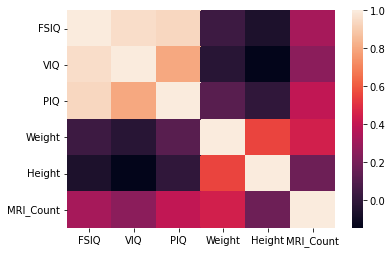

In [12]:
# Code cell 12
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Del mismo modo, el siguiente código crea y traza un mapa de calor para la estructura de datos masculina únicamente.

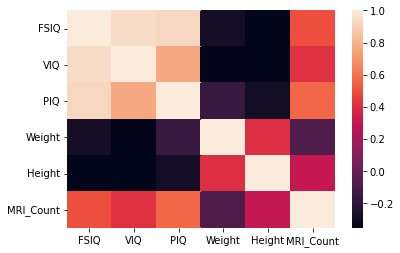

In [13]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Muchos pares de variables presentan una correlación cercana a cero. ¿Qué significa?

Representan que no dependerá la inteligencia frente al tamaño o peso

¿Por qué se separan los géneros?

Porque cada peso que tenga cada uno, cambiará en los resultados

¿Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera? Explique.

Depende más del tamaño que presenta la persona al ser estudiada

<font size='0.5'>© 2017 Cisco y/o sus filiales. Todos los derechos reservados. Este documento es información pública de Cisco.<font>